In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
!pip install indic-nlp-library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 37.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.5/89.5 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-cv 0.9.0 requires keras

In [1]:
import pandas as pd
import re


In [3]:
conversation = """
Recovery Agent (RA): नमस्ते श्री कुमार, मैं एक्स वाई जेड फाइनेंस से बोल रहा हूं। आपके लोन के बारे में बात करनी थी।
Borrower (B): हां, बोलिए। क्या बात है?
RA: सर, आपका पिछले महीने का EMI अभी तक नहीं आया है। क्या कोई समस्या है?
B: हां, थोड़ी दिक्कत है। मेरी नौकरी चली गई है और मैं नया काम ढूंढ रहा हूं।
RA: ओह, यह तो बुरा हुआ। लेकिन सर, आपको समझना होगा कि लोन का भुगतान समय पर करना बहुत जरूरी है।
B: मैं समझता हूं, लेकिन अभी मेरे पास पैसे नहीं हैं। क्या कुछ समय मिल सकता है?
RA: हम समझते हैं आपकी स्थिति। क्या आप अगले हफ्ते तक कुछ भुगतान कर सकते हैं?
B: मैं कोशिश करूंगा, लेकिन पूरा EMI नहीं दे पाऊंगा। क्या आधा भुगतान चलेगा?
RA: ठीक है, आधा भुगतान अगले हफ्ते तक कर दीजिए। बाकी का क्या प्लान है आपका?
B: मुझे उम्मीद है कि अगले महीने तक मुझे नया काम मिल जाएगा। तब मैं बाकी बकाया चुका दूंगा।
RA: ठीक है। तो हम ऐसा करते हैं - आप अगले हफ्ते तक आधा EMI जमा कर दीजिए, और अगले महीने के 15 तारीख तक बाकी का भुगतान कर दीजिए। क्या यह आपको स्वीकार है?
B: हां, यह ठीक रहेगा। मैं इस प्लान का पालन करने की पूरी कोशिश करूंगा।
RA: बहुत अच्छा। मैं आपको एक SMS भेज रहा हूं जिसमें भुगतान की डिटेल्स होंगी। कृपया इसका पालन करें और समय पर भुगतान करें।
B: ठीक है, धन्यवाद आपके समझने के लिए।
RA: आपका स्वागत है। अगर कोई और सवाल हो तो मुझे बताइएगा। अलविदा।
B: अलविदा।
"""



In [4]:
conversation

'\nRecovery Agent (RA): नमस्ते श्री कुमार, मैं एक्स वाई जेड फाइनेंस से बोल रहा हूं। आपके लोन के बारे में बात करनी थी।\nBorrower (B): हां, बोलिए। क्या बात है?\nRA: सर, आपका पिछले महीने का EMI अभी तक नहीं आया है। क्या कोई समस्या है?\nB: हां, थोड़ी दिक्कत है। मेरी नौकरी चली गई है और मैं नया काम ढूंढ रहा हूं।\nRA: ओह, यह तो बुरा हुआ। लेकिन सर, आपको समझना होगा कि लोन का भुगतान समय पर करना बहुत जरूरी है।\nB: मैं समझता हूं, लेकिन अभी मेरे पास पैसे नहीं हैं। क्या कुछ समय मिल सकता है?\nRA: हम समझते हैं आपकी स्थिति। क्या आप अगले हफ्ते तक कुछ भुगतान कर सकते हैं?\nB: मैं कोशिश करूंगा, लेकिन पूरा EMI नहीं दे पाऊंगा। क्या आधा भुगतान चलेगा?\nRA: ठीक है, आधा भुगतान अगले हफ्ते तक कर दीजिए। बाकी का क्या प्लान है आपका?\nB: मुझे उम्मीद है कि अगले महीने तक मुझे नया काम मिल जाएगा। तब मैं बाकी बकाया चुका दूंगा।\nRA: ठीक है। तो हम ऐसा करते हैं - आप अगले हफ्ते तक आधा EMI जमा कर दीजिए, और अगले महीने के 15 तारीख तक बाकी का भुगतान कर दीजिए। क्या यह आपको स्वीकार है?\nB: हां, यह ठीक रहेगा। मैं इस प्लान का पालन करने

In [60]:
#conversation = conversation.lower()

## Cleaning the punctuations from the conversation using regular expression

In [5]:
ct =  re.sub(r'[?|$|.|!|-|)|(|।|,|:|;|]','', conversation)

In [6]:
ct

'\nRecovery Agent RA नमस्ते श्री कुमार मैं एक्स वाई जेड फाइनेंस से बोल रहा हूं आपके लोन के बारे में बात करनी थी\nBorrower B हां बोलिए क्या बात है\nRA सर आपका पिछले महीने का EMI अभी तक नहीं आया है क्या कोई समस्या है\nB हां थोड़ी दिक्कत है मेरी नौकरी चली गई है और मैं नया काम ढूंढ रहा हूं\nRA ओह यह तो बुरा हुआ लेकिन सर आपको समझना होगा कि लोन का भुगतान समय पर करना बहुत जरूरी है\nB मैं समझता हूं लेकिन अभी मेरे पास पैसे नहीं हैं क्या कुछ समय मिल सकता है\nRA हम समझते हैं आपकी स्थिति क्या आप अगले हफ्ते तक कुछ भुगतान कर सकते हैं\nB मैं कोशिश करूंगा लेकिन पूरा EMI नहीं दे पाऊंगा क्या आधा भुगतान चलेगा\nRA ठीक है आधा भुगतान अगले हफ्ते तक कर दीजिए बाकी का क्या प्लान है आपका\nB मुझे उम्मीद है कि अगले महीने तक मुझे नया काम मिल जाएगा तब मैं बाकी बकाया चुका दूंगा\nRA ठीक है तो हम ऐसा करते हैं - आप अगले हफ्ते तक आधा EMI जमा कर दीजिए और अगले महीने के 15 तारीख तक बाकी का भुगतान कर दीजिए क्या यह आपको स्वीकार है\nB हां यह ठीक रहेगा मैं इस प्लान का पालन करने की पूरी कोशिश करूंगा\nRA बहुत अच्छा मैं आपको एक SM

In [7]:
all_words = ct.split()

In [8]:
total_words = len(all_words)
total_words

263

In [9]:
all_words

['Recovery',
 'Agent',
 'RA',
 'नमस्ते',
 'श्री',
 'कुमार',
 'मैं',
 'एक्स',
 'वाई',
 'जेड',
 'फाइनेंस',
 'से',
 'बोल',
 'रहा',
 'हूं',
 'आपके',
 'लोन',
 'के',
 'बारे',
 'में',
 'बात',
 'करनी',
 'थी',
 'Borrower',
 'B',
 'हां',
 'बोलिए',
 'क्या',
 'बात',
 'है',
 'RA',
 'सर',
 'आपका',
 'पिछले',
 'महीने',
 'का',
 'EMI',
 'अभी',
 'तक',
 'नहीं',
 'आया',
 'है',
 'क्या',
 'कोई',
 'समस्या',
 'है',
 'B',
 'हां',
 'थोड़ी',
 'दिक्कत',
 'है',
 'मेरी',
 'नौकरी',
 'चली',
 'गई',
 'है',
 'और',
 'मैं',
 'नया',
 'काम',
 'ढूंढ',
 'रहा',
 'हूं',
 'RA',
 'ओह',
 'यह',
 'तो',
 'बुरा',
 'हुआ',
 'लेकिन',
 'सर',
 'आपको',
 'समझना',
 'होगा',
 'कि',
 'लोन',
 'का',
 'भुगतान',
 'समय',
 'पर',
 'करना',
 'बहुत',
 'जरूरी',
 'है',
 'B',
 'मैं',
 'समझता',
 'हूं',
 'लेकिन',
 'अभी',
 'मेरे',
 'पास',
 'पैसे',
 'नहीं',
 'हैं',
 'क्या',
 'कुछ',
 'समय',
 'मिल',
 'सकता',
 'है',
 'RA',
 'हम',
 'समझते',
 'हैं',
 'आपकी',
 'स्थिति',
 'क्या',
 'आप',
 'अगले',
 'हफ्ते',
 'तक',
 'कुछ',
 'भुगतान',
 'कर',
 'सकते',
 'हैं',
 'B',
 'मैं',
 

## Used indicnlp library for hindi text

In [12]:
from indicnlp.tokenize import indic_tokenize
def tokenization(indic_string):
    tokens = []
    for t in indic_tokenize.trivial_tokenize(indic_string):
        tokens.append(t)
    return tokens

In [13]:
tokenized_word = tokenization(ct)

In [14]:
stop_words = [
    "के", "और", "में","हां", "का", "कि", "क्या", "है", "नहीं", "से", "तो", "यह", "मैं", "आप", 
    "पर", "हूं", "हैं", "तक", "जो", "की", "को", "गया","कर","रहा","आपका","आपको", "अगर", "हो"
]

## Removing stop words

In [15]:
without_stop_words = ' '.join([word for word in ct.split() if word not in stop_words])

In [16]:
total_ws = without_stop_words.split()
print(len(total_ws))

172


## Most common ten characters

In [17]:
from collections import Counter

In [18]:
all_words_count = Counter(ct.split())
all_frequent_words = all_words_count.most_common(10)

print("Most frequent words:")
for word, count in all_frequent_words:
  print(f"\t- {word}: {count}")

Most frequent words:
	- है: 14
	- RA: 8
	- B: 8
	- मैं: 7
	- क्या: 7
	- भुगतान: 7
	- तक: 6
	- का: 5
	- अगले: 5
	- हूं: 4


Here the most common words are given above without removing the stop words

In [19]:
word_counts = Counter(without_stop_words.split())
most_frequent_words = word_counts.most_common(10)

print("Most frequent words:")
for word, count in most_frequent_words:
  print(f"\t- {word}: {count}")

Most frequent words:
	- RA: 8
	- B: 8
	- भुगतान: 7
	- अगले: 5
	- ठीक: 4
	- महीने: 3
	- EMI: 3
	- लेकिन: 3
	- समय: 3
	- हफ्ते: 3


Here is the list of top 10 words used after removing stop words...here the RA and B are the persons who are not removed cause we need it for further analysys

## Visualizaiton view of top words used

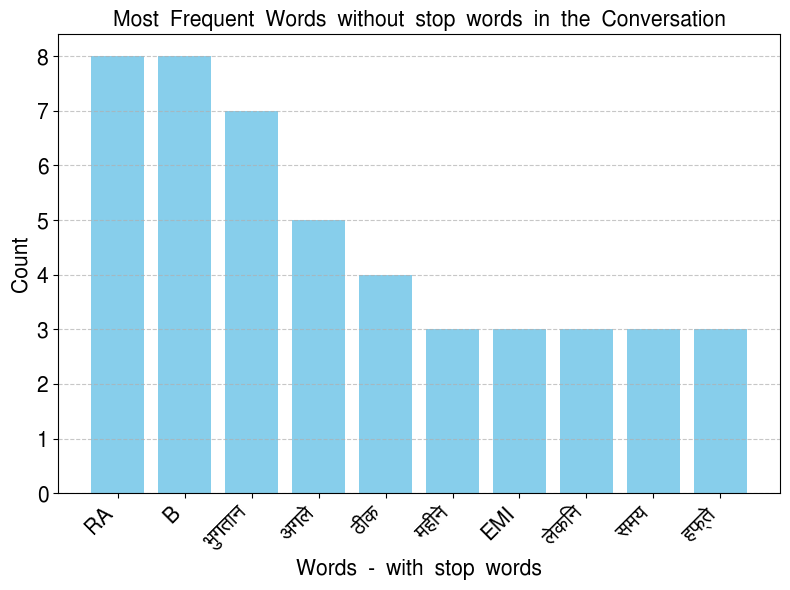

In [20]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import requests

# Download and save the font
url = "https://hindityping.info/download/assets/Hindi-Fonts-Unicode/gargi.ttf"
r = requests.get(url, allow_redirects=True)
font_path = "gargi.ttf"
with open(font_path, "wb") as fw:
    fw.write(r.content)

# Define font properties
font_prop = FontProperties(fname=font_path, size=15)


# Create the plot
plt.figure(figsize=(8, 6)) 

words = [word for word, _ in most_frequent_words] 
counts = [count for _, count in most_frequent_words] 

plt.bar(words, counts, color='skyblue')

ax = plt.gca()  # Get the current axis

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(15)
    
plt.xticks(rotation=45, ha='right')
plt.xlabel("Words - with stop words", fontproperties=font_prop)
plt.ylabel("Count", fontproperties=font_prop)
plt.title("Most Frequent Words without stop words in the Conversation", fontproperties=font_prop)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()  
plt.show()


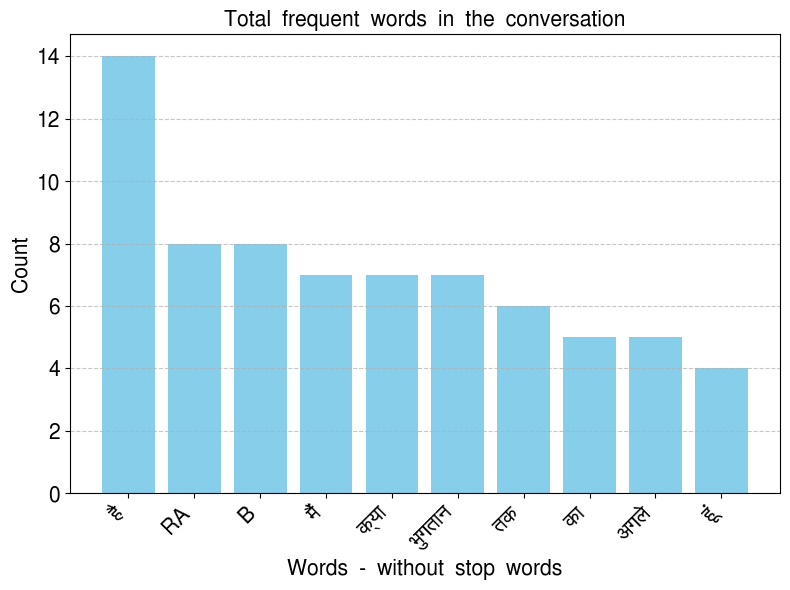

In [21]:
# Create the plot
plt.figure(figsize=(8, 6)) 

words = [word for word, _ in all_frequent_words] 
counts = [count for _, count in all_frequent_words] 

plt.bar(words, counts, color='skyblue')

ax = plt.gca()  # Get the current axis

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(15)  
    
plt.xticks(rotation=45, ha='right')
plt.xlabel("Words - without stop words", fontproperties=font_prop)
plt.ylabel("Count", fontproperties=font_prop)
plt.title("Total frequent words in the conversation", fontproperties=font_prop)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()  
plt.show()

 # Bigrams

In [24]:
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures


bigram_fd = nltk.FreqDist(nltk.bigrams(tokenized_word))
# Top ten frequencies.
bigram_fd.most_common(10)


[(('अगले', 'हफ्ते'), 3),
 (('हफ्ते', 'तक'), 3),
 (('ठीक', 'है'), 3),
 (('कर', 'दीजिए'), 3),
 (('रहा', 'हूं'), 2),
 (('है\nB', 'हां'), 2),
 (('नया', 'काम'), 2),
 (('का', 'भुगतान'), 2),
 (('समय', 'पर'), 2),
 (('आप', 'अगले'), 2)]

## Wordcloud

In [25]:
from wordcloud import WordCloud

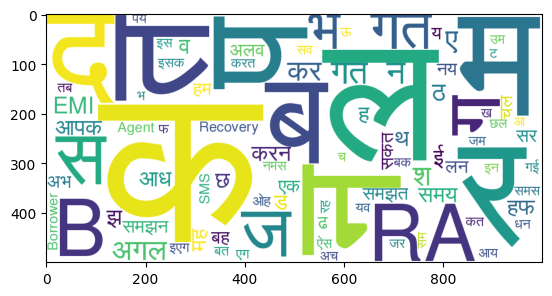

In [38]:
font_prop = FontProperties(fname=font_path, size=15)
word_cloud = ""
for row in without_stop_words:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,font_path=font_path,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [39]:
conversation_text = ct

# Translating to english for further analysis

In [40]:
pip install googletrans==4.0.0-rc1                  # used googletrans for translation of text

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=886cd2dfca0ff2e69a911fa15f44bfd825f6f414c8733e3ff96aa428bd690a46
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
     

In [41]:
from googletrans import Translator

translator = Translator()
trans_text = translator.translate(ct, src='hi',dest='en').text


print(trans_text)

Recovery agent ra namaste Mr. Kumar I am speaking from XY Z Finance to talk about your loan
Borrower b yes what's the matter
Ra sir your EMI of your last month has not come yet, is there any problem
B yes there is some problem, my job is gone and I am looking for new work
Ra oh this is bad but sir you have to understand that it is very important to pay the loan on time
B i understand but I don't have money right now can I get some time
Ra we understand your situation what you can pay by next week
B i will try but will not be able to give full EMI, will half the payment go
RA okay, pay half the payment till next week, what is your plan
B i hope that by next month I will get a new job, then I will pay the rest of the arrears
RA okay then we do this - you submit half EMI by next week and pay the rest by the 15th of next month, is it you accept it.
B yes it will be fine I will try my best to follow this plan
Ra Very good I am sending you an SMS that will have payment details, please follow

# Summarization 

In [42]:
!pip install transformers torch nltk rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=9d34ddc1d7423453c4373651511b327c124dc82150ca63e1f486af6be3109a08
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [43]:
from transformers import BartForConditionalGeneration, BartTokenizer

In [44]:
model_name = 'facebook/bart-large-cnn'
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [45]:
def preprocess_text(text):
    inputs = tokenizer.batch_encode_plus([text], max_length=1024, return_tensors='pt', truncation=True)
    return inputs

def summarize_text(text):
    inputs = preprocess_text(text)
    summary_ids = model.generate(inputs['input_ids'], num_beams=4, max_length=100,min_length=80, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [46]:
print("summary--")
summarize_text(trans_text)

summary--


'Recovery agent ra namaste Mr. Kumar is speaking from XY Z Finance to talk about your loan. He asks the borrower to pay half EMI by next week and pay the rest by the 15th of next month. He sends an SMS that will have payment details, please follow it and pay on time. Mr Kumar says he will try his best to follow this plan and thank you for your understanding.'

# Summary of the conversation - 
## 'Recovery agent ra namaste Mr. Kumar is speaking from XY Z Finance to talk about your loan. He asks the borrower to pay half EMI by next week and pay the rest by the 15th of next month. He sends an SMS that will have payment details, please follow it and pay on time. Mr Kumar says he will try his best to follow this plan and thank you for your understanding.'

# Key actions

In [52]:
import spacy
nlp = spacy.load('en_core_web_sm')

def extract_entities(text):
    doc = nlp(trans_text)
    
    # Extract entities
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    
    return entities

# Extract entities
entities = extract_entities(without_stop_words)
print("Entities:", entities)


Entities: [('Kumar', 'PERSON'), ('XY Z Finance', 'ORG'), ('Borrower', 'PERSON'), ('Ra', 'NORP'), ('last month', 'DATE'), ('Ra', 'PERSON'), ('Ra', 'NORP'), ('next week', 'DATE'), ('EMI', 'ORG'), ('half', 'CARDINAL'), ('RA', 'ORG'), ('half', 'CARDINAL'), ('next week', 'DATE'), ('next month', 'DATE'), ('RA', 'ORG'), ('EMI', 'ORG'), ('next week', 'DATE'), ('the 15th of next month', 'DATE'), ('Ra Very', 'PERSON'), ('RA', 'ORG')]


# sentiment of each of the conversation between borrower and agent

In [53]:
from transformers import pipeline

model_name = "distilbert-base-uncased-finetuned-sst-2-english"

sentiment_analyzer = pipeline("sentiment-analysis", model=model_name)

2024-07-22 05:46:36.468038: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 05:46:36.468159: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 05:46:36.609824: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [56]:
sentences = trans_text.strip().split('\n')

def analyze_sentiment(sentences):
    return [sentiment_analyzer(sentence) for sentence in sentences]

sentiment_results = analyze_sentiment(sentences)

for sentence, result in zip(sentences, sentiment_results):
    print(f"Sentence: {sentence}\nSentiment: {result}\n")
    print("**"*30)

Sentence: Recovery agent ra namaste Mr. Kumar I am speaking from XY Z Finance to talk about your loan
Sentiment: [{'label': 'POSITIVE', 'score': 0.9924473762512207}]

************************************************************
Sentence: Borrower b yes what's the matter
Sentiment: [{'label': 'NEGATIVE', 'score': 0.793384313583374}]

************************************************************
Sentence: Ra sir your EMI of your last month has not come yet, is there any problem
Sentiment: [{'label': 'NEGATIVE', 'score': 0.9923222661018372}]

************************************************************
Sentence: B yes there is some problem, my job is gone and I am looking for new work
Sentiment: [{'label': 'NEGATIVE', 'score': 0.9997133612632751}]

************************************************************
Sentence: Ra oh this is bad but sir you have to understand that it is very important to pay the loan on time
Sentiment: [{'label': 'NEGATIVE', 'score': 0.9723685383796692}]

**********

In [ ]:
From overall analysis the sentiment is positive throughout the conversation